In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Загрузка данных
df = pd.read_csv('./../data/base.csv')
df

,x_1,x_2,y
0,42,86,592
1,76,8,596
2,25,84,467
3,66,69,709
4,99,84,985
...,...,...,...
395,91,68,881
396,90,10,700
397,47,90,639
398,19,61,356


In [80]:
df.describe()

,x_1,x_2,y
count,400.000000,400.000000,400.00000
mean,49.072500,49.070000,530.71750
std,28.695572,29.842025,218.20803
min,0.000000,0.000000,53.00000
25%,25.000000,24.000000,360.50000
50%,47.000000,47.000000,529.50000
75%,75.000000,77.000000,692.25000
max,99.000000,99.000000,1024.00000


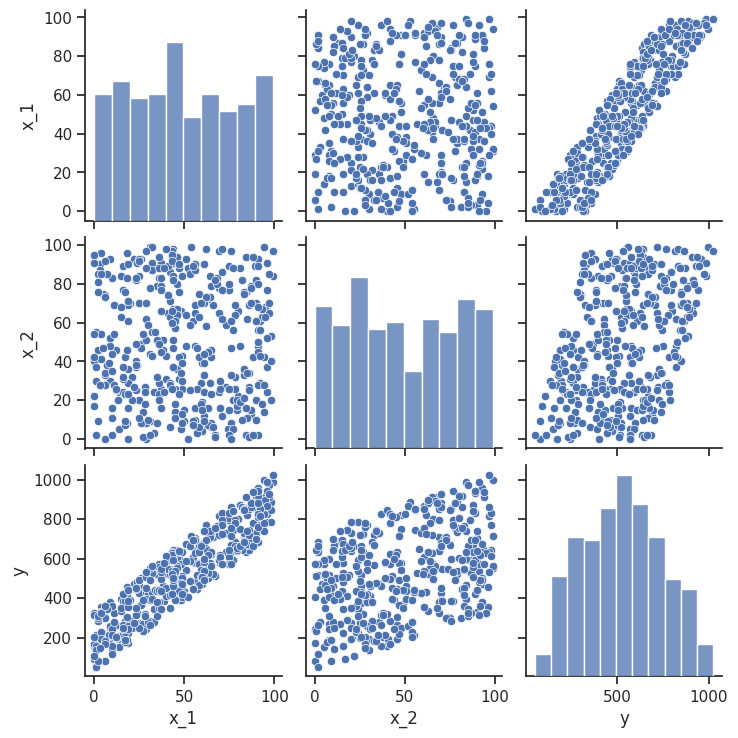

In [74]:
import seaborn as sns

sns.pairplot(df)

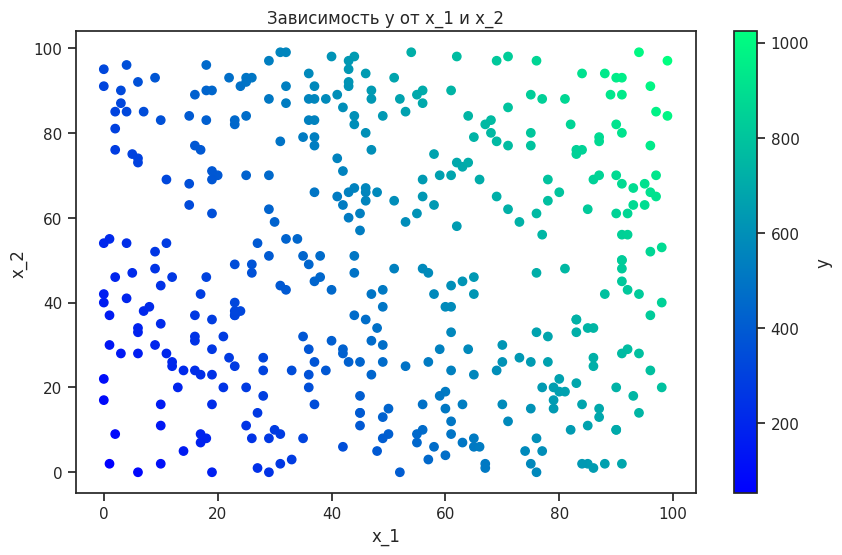

In [75]:
import matplotlib.pyplot as plt


# Визуализация данных
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x_1'], df['x_2'], c=df['y'], cmap='winter')
plt.colorbar(scatter, label='y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Зависимость y от x_1 и x_2')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Разделение данных на обучающую и тестовую выборки
X = df[['x_1', 'x_2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
from sklearn.metrics import mean_squared_error, \
    mean_absolute_error, \
    mean_absolute_percentage_error, \
    r2_score

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
print(f'Среднеквадратическая ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'Средняя абсолютная процентная ошибка: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

Среднеквадратическая ошибка: 8.128422767397306e-27
Средняя абсолютная ошибка: 5.4356519285647667e-14
Средняя абсолютная процентная ошибка: 1.5681611595827745e-16
R2: 1.0


In [79]:
print(f"""
Коэффициенты модели: {list(model.coef_)}
Смещение: {model.intercept_}
""")


Коэффициенты модели: [np.float64(7.000000000000002), np.float64(2.9999999999999982)]
Смещение: 39.99999999999994



Анализируя модель легко понять формулу по которой задача решается аналитически:

$y = 40 + 7x_1 + 3x_2$

